# 모바일 게임 리뷰 데이터 분석
> 머닝 러신(devkobert@gmail.com)

## 0. Install dependencies

In [1]:
!pip install kss
!pip install soyspacing
!pip install soynlp
!pip install emoji
!pip install git+https://github.com/ssut/py-hanspell.git
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

     |████████████████████████████████| 42.4 MB 105 kB/s 
     |████████████████████████████████| 170 kB 81.4 MB/s 
  Created wheel for kss: filename=kss-3.2.0-py3-none-any.whl size=42447995 sha256=46eade8138a16e134469261af95c6db9b43bca8e4fd444daa1a04e823bb109ad
  Stored in directory: /root/.cache/pip/wheels/a1/47/9c/a5f83b5ab6096e3c4a33643fc553b26098c23e72b6539b86f4
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=30ca877febd0ed65bce60fd26849628528515771bb7e9db27477bac5d0fa966e
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built kss emoji
     |████████████████████████████████| 416 kB 13.0 MB/s 
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-84wldydp
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-84wldydp
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4868 sha256=0783b1ef44b0afe

#### - mecab 설정

In [2]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:13 https://cloud.r-proj

In [4]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [3]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:9 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:13 https://developer.download.nvidia.com/

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0   927k      0  0:00:01  0:00:01 --:--:-- 3880k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

#### - 라이브러리 불러오기

In [7]:
import pandas as pd
#import kss #문장분리
from pykospacing import Spacing
from hanspell import spell_checker
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt, Mecab
# from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
import torch
import requests
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/munning_rachine/dataset/PlaystoreReviewData.csv', encoding='utf-8-sig', index_col=0)

## 1. 데이터 전처리

In [ ]:
#원래 리뷰는 Comment열에 그대로 두고 텍스트 전처리를 한 문자은 Comment_processed에 넣을 것임
# df.loc[:,'Comment_processed'] = df.loc[:,'Comment']

#### 특수문자 제거

In [ ]:
punct = "/-'?!.,#%\'*+-/:;<=>@\\^_`|~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&' #괄호와 문장 구분자($)를 제외한 특수문자 제거

In [ ]:
punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', }

In [ ]:
def clean_punc(text, punct, mapping):
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    for p in punct:
        text = text.replace(p, f' {p} ')
    
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text.strip()

In [ ]:
i=0
for sent in list(df.iloc[:,6]):
  df.at[i, 'Comment_processed'] = clean_punc(sent, punct, punct_mapping)
  i = i + 1

#### 기타 전처리

In [ ]:
import re

def clean_text(texts):    
    i=0
    for sent in list(texts.iloc[:,8]):
    # review = re.sub(r'\d+','', str(texts[i])) # remove number
      review = re.sub(r'\s+', ' ', str(sent)) #remove extra space
      review = review.lower() #lower case
      review = re.sub(r'<[^>]+>','',review) #remove Html tags
      review = re.sub(r'\s+', ' ', review) #remove spaces
      review = re.sub(r"^\s+", '', review) #remove space from start
      review = re.sub(r'\s+$', '', review) #remove space from the end
      texts.at[i, 'Comment_processed'] = review
      i = i + 1      
    return texts

In [ ]:
clean_text(df)

,Collection Date,App Name,Comment Date,User,Rating,Helpful,Comment,Answer,Comment_processed
0,2021-07-05 21:30,오딘: 발할라 라이징,2021-07-02,안유민,1,162,첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기열이 많아 접속자체를 할수가...,Kakao Games Corp.2021년 7월 5일안녕하세요. 신의 영역을 차지하라...,첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기열이 많아 접속자체를 할수가...
1,2021-07-05 21:30,오딘: 발할라 라이징,2021-07-02,어제보다오늘더c.k. C,1,132,모바일 게임 그동안 참 많이 했는데... 다른 게임들은 그나마 실행후 플레이 하면서...,NaN,모바일 게임 그동안 참 많이 했는데 . . . 다른 게임들은 그나마 실행후 플레이 ...
2,2021-07-05 21:30,오딘: 발할라 라이징,2021-06-29,유승엽,3,65,제2랑 차이보면 카툰과 실사느낌차이. 캐릭터 커스터마이징 비슷함. 이직 초반이지만 ...,NaN,제2랑 차이보면 카툰과 실사느낌차이 . 캐릭터 커스터마이징 비슷함 . 이직 초반이지...
3,2021-07-05 21:30,오딘: 발할라 라이징,2021-07-01,김용욱,1,58,자 자 어떤게임인지 간단히 소개해드릴께요. 전사 궁수 법사 힐러 고르세요. 화려한그...,NaN,자 자 어떤게임인지 간단히 소개해드릴께요 . 전사 궁수 법사 힐러 고르세요 . 화려...
4,2021-07-05 21:30,오딘: 발할라 라이징,2021-06-30,노랑꼬리,1,33,문장을 구매해서 강화하는데 무조건 실패시 파괴 ㅋㅋㅋㅋㅋㅋ 파괴 당하고 바로 삭제 ...,NaN,문장을 구매해서 강화하는데 무조건 실패시 파괴 ㅋㅋㅋㅋㅋㅋ 파괴 당하고 바로 삭제 ...
...,...,...,...,...,...,...,...,...,...
10523,2021-07-05 21:30,Rider,2021-06-09,Hyunjo Kim,2,2,차고로 들어가면 게임이 멈춤,NaN,차고로 들어가면 게임이 멈춤
10524,2021-07-05 21:30,Rider,2021-06-13,Mr김치,1,0,응 개똥게임 차선택이안된고클릭도 안되,NaN,응 개똥게임 차선택이안된고클릭도 안되
10525,2021-07-05 21:30,Rider,2021-06-25,박점숙,5,0,눈동자 지 너무 잘 먹고,NaN,눈동자 지 너무 잘 먹고
10526,2021-07-05 21:30,Rider,2021-06-15,장문자,5,0,그냥그대로멈추는데? 와 버그대박 불상해서 많ㅇㄱ드릴게요,NaN,그냥그대로멈추는데 ? 와 버그대박 불상해서 많ㅇㄱ드릴게요


In [ ]:
from soynlp.normalizer import *
import emoji 

def clean_etc(texts):
  i=0
  for sent in list(texts.iloc[:,8]):
    review = emoticon_normalize(sent, num_repeats=1) #ㅠㅠㅠ의 경우 ㅠ로 축약
    review = emoji.demojize(review) #이모티콘을 :이모티콘 이름:의 형식으로 변환
    review = re.sub("[:].*[:]", ' ', review) #:~:를 제거함
    review = re.sub('♥','', review) #♥를 제거함
    review = re.sub('♡','', review) #♡를 제거함
    texts.at[i, 'Comment_processed'] = review
    # print(review)
    i = i + 1
  return texts

In [ ]:
clean_etc(df)

,Collection Date,App Name,Comment Date,User,Rating,Helpful,Comment,Answer,Comment_processed
0,2021-07-05 21:30,오딘: 발할라 라이징,2021-07-02,안유민,1,162,첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기열이 많아 접속자체를 할수가...,Kakao Games Corp.2021년 7월 5일안녕하세요. 신의 영역을 차지하라...,첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기열이 많아 접속자체를 할수가...
1,2021-07-05 21:30,오딘: 발할라 라이징,2021-07-02,어제보다오늘더c.k. C,1,132,모바일 게임 그동안 참 많이 했는데... 다른 게임들은 그나마 실행후 플레이 하면서...,NaN,모바일 게임 그동안 참 많이 했는데 . . . 다른 게임들은 그나마 실행후 플레이 ...
2,2021-07-05 21:30,오딘: 발할라 라이징,2021-06-29,유승엽,3,65,제2랑 차이보면 카툰과 실사느낌차이. 캐릭터 커스터마이징 비슷함. 이직 초반이지만 ...,NaN,제2랑 차이보면 카툰과 실사느낌차이 . 캐릭터 커스터마이징 비슷함 . 이직 초반이지...
3,2021-07-05 21:30,오딘: 발할라 라이징,2021-07-01,김용욱,1,58,자 자 어떤게임인지 간단히 소개해드릴께요. 전사 궁수 법사 힐러 고르세요. 화려한그...,NaN,자 자 어떤게임인지 간단히 소개해드릴께요 . 전사 궁수 법사 힐러 고르세요 . 화려...
4,2021-07-05 21:30,오딘: 발할라 라이징,2021-06-30,노랑꼬리,1,33,문장을 구매해서 강화하는데 무조건 실패시 파괴 ㅋㅋㅋㅋㅋㅋ 파괴 당하고 바로 삭제 ...,NaN,문장을 구매해서 강화하는데 무조건 실패시 파괴 ㅋ 파괴 당하고 바로 삭제 현질 유도...
...,...,...,...,...,...,...,...,...,...
10523,2021-07-05 21:30,Rider,2021-06-09,Hyunjo Kim,2,2,차고로 들어가면 게임이 멈춤,NaN,차고로 들어가면 게임이 멈춤
10524,2021-07-05 21:30,Rider,2021-06-13,Mr김치,1,0,응 개똥게임 차선택이안된고클릭도 안되,NaN,응 개똥게임 차선택이안된고클릭도 안되
10525,2021-07-05 21:30,Rider,2021-06-25,박점숙,5,0,눈동자 지 너무 잘 먹고,NaN,눈동자 지 너무 잘 먹고
10526,2021-07-05 21:30,Rider,2021-06-15,장문자,5,0,그냥그대로멈추는데? 와 버그대박 불상해서 많ㅇㄱ드릴게요,NaN,그냥그대로멈추는데 ? 와 버그대박 불상해서 ㅇㄱ릴게요


In [ ]:
#이모티콘이 잘 제거되었는지 확인
list(df.loc[:]['Comment_processed'])

['첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기열이 많아 접속자체를 할수가 없습니다 . 돈은 썼는데 게임을하다가 질려서 접은것도 아니고 접속이 되야 무슨 게임을하죠 하루종일 대기열기다리느라 핸드폰을 켜둘수도 없고 직장생활하며 집에서 잠깐씩 하려는데 언제쯤 접속이 되나요 . 대기열을 계속 이대로 둘꺼면 환불해주시기 바랍니다 .',
 '모바일 게임 그동안 참 많이 했는데 . . . 다른 게임들은 그나마 실행후 플레이 하면서 , 좋고 나쁨의 상태를 알수 있었는데 . . 이겜은 플레이 해보는거 자체가 하늘의 별 따기임 . . 직장인은 대기만 타다 하루 보내고 , 그나마 할수 있더라도 저녁에 접해서 하더라도 역시나 있는 변신 시스템 . . 말장난으로 끝나는 아바타 . . 엠소모도 너무 심해서 퀘 2 ~ 3개면 끝 . . . 그나마 그래픽 하나는 좋다는것뿐 . . . 역대 현질 심하다는 리니지 보다 . . 떨어지고 . . 다른 게임 하는게 마음 편할듯 합니다 . . .',
 '제2랑 차이보면 카툰과 실사느낌차이 . 캐릭터 커스터마이징 비슷함 . 이직 초반이지만 트라하 게임이랑 비슷하면서도 검은사막에는 못 미친다는 느낌 ? 그래픽도 좋긴한데 , 검은사막 따라하다 . 트라하보다 못한 화면연출 , 프래임 . 아니 제2보다 못하다는 소리를 들을수도 있어요 . 성급하지만 , 그냥 리레2 느낌이 너무나요 . 아직 제2는 무난하네요 . 오래가길 원하신다면 과금에 신경 써주시면 감사하죠 . 수고하셨습니다 .',
 '자 자 어떤게임인지 간단히 소개해드릴께요 . 전사 궁수 법사 힐러 고르세요 . 화려한그래픽으로시작합니다 . (갓게임 god이 나옵니다) 일단 퀘따라자동이동을 시작하죠 . 기능이 한개씩 오픈됩니다 . 자동사냥도 가능합니다 . 퀘스트 자동 이동도됩니다 . 미미르라고 경치 골드 버프도있죠 . 피로도처럼 깍입니다 . (동전넣고 충전가능합니다) 탈것두줍니다 . 리 * 지 변신처럼 아바타도 줍니다 . 직업별로 나누어져요 . 경험치 슬슬 안오르고 딜부족하다 느끼시면 , 과금

#### 문장끼리 띄어쓰기

In [ ]:
spacing = Spacing()
stack = ""

for i in range(len(df)):
  for st in kss.split_sentences(df.iloc[i][6]):
    stack = stack+"$"+st
  df.at[i, 'Comment_processed'] = stack #i번째 코멘트를 stack의 값으로 바꿈
  stack = ""

In [ ]:
list(df.loc[0:5]['Comment_processed'])

['$첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기열이 많아 접속자체를 할수가 없습니다.$돈은 썼는데 게임을하다가 질려서 접은것도 아니고 접속이 되야 무슨 게임을하죠$하루종일 대기열기다리느라 핸드폰을 켜둘수도 없고 직장생활하며 집에서 잠깐씩 하려는데 언제쯤 접속이 되나요.$대기열을 계속 이대로 둘꺼면 환불해주시기 바랍니다.',
 '$모바일 게임 그동안 참 많이 했는데...$다른 게임들은 그나마 실행후 플레이 하면서, 좋고 나쁨의 상태를 알수 있었는데..$이겜은 플레이 해보는거 자체가 하늘의 별 따기임.. 직장인은 대기만 타다 하루 보내고, 그나마 할수 있더라도 저녁에 접해서 하더라도 역시나 있는 변신 시스템.. 말장난으로 끝나는 아바타.. 엠소모도 너무 심해서 퀘 2~3개면 끝... 그나마 그래픽 하나는 좋다는것뿐... 역대 현질 심하다는 리니지 보다..$떨어지고.. 다른 게임 하는게 마음 편할듯 합니다...',
 '$제2랑 차이보면 카툰과 실사느낌차이. 캐릭터 커스터마이징 비슷함. 이직 초반이지만 트라하 게임이랑 비슷하면서도 검은사막에는 못 미친다는 느낌? 그래픽도 좋긴한데, 검은사막 따라하다.$트라하보다 못한 화면연출, 프래임. 아니 제2보다 못하다는 소리를 들을수도 있어요.$성급하지만, 그냥 리레2 느낌이 너무나요.$아직 제2는 무난하네요.$오래가길 원하신다면 과금에 신경 써주시면 감사하죠.$수고하셨습니다.',
 '$자 자 어떤게임인지 간단히 소개해드릴께요.$전사 궁수 법사 힐러 고르세요.$화려한그래픽으로시작합니다.$(갓게임 GOD이 나옵니다) 일단 퀘따라자동이동을 시작하죠.$기능이 한개씩 오픈됩니다.$자동사냥도 가능합니다.$퀘스트 자동 이동도됩니다.$미미르라고 경치 골드 버프도있죠.$피로도처럼 깍입니다.$(동전넣고 충전가능합니다) 탈것두줍니다.$리*지 변신처럼 아바타도 줍니다.$직업별로 나누어져요.$경험치 슬슬 안오르고 딜부족하다 느끼시면, 과금10만원정도하시면 뽑기도 신나게 뽑을수있어요.$희귀템 뽑으시면 조금 쎄집니다.$영웅급뽑으시면 공지도

In [ ]:
#맞춤법 검사 시 대략 2시간 소요 -> 저장 필요
# with open('/content/drive/MyDrive/ID_게임 앱 리뷰 분석을 통한 맞춤 추천/1. Dataset/grammar.txt', 'r+') as f:
#     for line in checked_cs:
#         f.write(line)
#         f.write("\n")

In [ ]:
#맞춤법 검사 하기 전에 판다스 저장
df.to_csv('/content/drive/MyDrive/munning_rachine/dataset/PlaystoreReviewData.csv', encoding = "utf-8-sig")

#### 맞춤법 검사하기

In [ ]:
# from hanspell import spell_checker #네이버 맞춤법 검사기를 이용한 파이썬용 한글 맞춤법 검사기
# li500 = []

# def spell_checking(texts, length):
#   error_list = []
#   i = 0
#   for sent in texts.iloc[:length, 8]:
#     try:
#       if len(sent) >= 500: #네이버 맞춤법 검사기는 최대 500자까지만 지원, 500자 초과 문장은 맞춤법 검사 X
#         print('500자 넘어서 건너뜀')
#         li500.append([sent, i])
#         continue
#       else: 
#         spelled_sent = spell_checker.check(sent)
#         checked_sent = spelled_sent.checked
#         sent = checked_sent
#     except:
#       print("에러")
#       error_list.append([sent,i])          
#     finally:  #정상 실행이든, 오류가 나든 한 리뷰의 문장들을 다시 corpus에 저장함      
#       texts.at[i, 'Comment_processed'] = sent
#       if i % 100 == 0:
#         print(i,"번째 리뷰 완료")
#       i = i + 1      
#   return texts

In [ ]:
df2 = df.copy()

In [ ]:
from hanspell import spell_checker #네이버 맞춤법 검사기를 이용한 파이썬용 한글 맞춤법 검사기
t
def spell_checking(texts, length):
  error_list, li500 = [], []
  corpus = ''
  for i in range(0, length):
      for sent in texts.loc[i]['Comment_processed'].split("$")[1:]:
          try:
            if len(sent) >= 500:
              print('500자 넘어서 건너뜀')
              li500.append([sent, i])
              continue            
            else: 
              spelled_sent = spell_checker.check(sent)
              checked_sent = spelled_sent.checked
              sent = checked_sent
          except:
            print('오류')
            error_list.append([sent, i])          
          finally:  #정상 실행이든, 오류가 나든 한 리뷰의 문장들을 다시 corpus에 저장함
            corpus = corpus + "$" + sent                    
      texts.at[i, 'Comment_processed'] = corpus #corpus를 i번째 리뷰부분에 넣음
      corpus = ''
      if i % 100 == 0:
          print(i,"번째 리뷰 완료")
  return texts

In [ ]:
df2.loc[0]['Comment_processed']

'$첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기열이 많아 접속자체를 할수가 없습니다.$돈은 썼는데 게임을하다가 질려서 접은것도 아니고 접속이 되야 무슨 게임을하죠$하루종일 대기열기다리느라 핸드폰을 켜둘수도 없고 직장생활하며 집에서 잠깐씩 하려는데 언제쯤 접속이 되나요.$대기열을 계속 이대로 둘꺼면 환불해주시기 바랍니다.'

In [ ]:
spell_checking(df2, len(df2))

0 번째 리뷰 완료
100 번째 리뷰 완료
200 번째 리뷰 완료
300 번째 리뷰 완료
400 번째 리뷰 완료
500 번째 리뷰 완료
600 번째 리뷰 완료
700 번째 리뷰 완료
800 번째 리뷰 완료
900 번째 리뷰 완료
1000 번째 리뷰 완료
1100 번째 리뷰 완료
1200 번째 리뷰 완료
1300 번째 리뷰 완료
1400 번째 리뷰 완료
1500 번째 리뷰 완료
1600 번째 리뷰 완료
1700 번째 리뷰 완료
1800 번째 리뷰 완료
1900 번째 리뷰 완료
오류
2000 번째 리뷰 완료
2100 번째 리뷰 완료
오류
2200 번째 리뷰 완료
2300 번째 리뷰 완료
2400 번째 리뷰 완료
2500 번째 리뷰 완료
오류
2600 번째 리뷰 완료
2700 번째 리뷰 완료
2800 번째 리뷰 완료
2900 번째 리뷰 완료
오류
500자 넘어서 건너뜀
3000 번째 리뷰 완료
3100 번째 리뷰 완료
오류
3200 번째 리뷰 완료
오류
3300 번째 리뷰 완료
3400 번째 리뷰 완료
3500 번째 리뷰 완료
3600 번째 리뷰 완료
3700 번째 리뷰 완료
3800 번째 리뷰 완료
3900 번째 리뷰 완료
4000 번째 리뷰 완료
4100 번째 리뷰 완료
오류
4200 번째 리뷰 완료
오류
4300 번째 리뷰 완료
4400 번째 리뷰 완료
4500 번째 리뷰 완료
4600 번째 리뷰 완료
4700 번째 리뷰 완료
4800 번째 리뷰 완료
오류
4900 번째 리뷰 완료
5000 번째 리뷰 완료
5100 번째 리뷰 완료
오류
5200 번째 리뷰 완료
5300 번째 리뷰 완료
5400 번째 리뷰 완료
5500 번째 리뷰 완료
5600 번째 리뷰 완료
오류
5700 번째 리뷰 완료
5800 번째 리뷰 완료
5900 번째 리뷰 완료
오류
6000 번째 리뷰 완료
오류
6100 번째 리뷰 완료
6200 번째 리뷰 완료
6300 번째 리뷰 완료
6400 번째 리뷰 완료
6500 번째 리뷰 완료
6600 번째 리뷰 완료
6700 번째 리뷰 완료
오류
6800 

,Collection Date,App Name,Comment Date,User,Rating,Helpful,Comment,Answer,Comment_processed
0,2021-07-05 21:30,오딘: 발할라 라이징,2021-07-02,안유민,1,162,첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기열이 많아 접속자체를 할수가...,Kakao Games Corp.2021년 7월 5일안녕하세요. 신의 영역을 차지하라...,$첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기 열이 많아 접속 자체를 ...
1,2021-07-05 21:30,오딘: 발할라 라이징,2021-07-02,어제보다오늘더c.k. C,1,132,모바일 게임 그동안 참 많이 했는데... 다른 게임들은 그나마 실행후 플레이 하면서...,NaN,$모바일 게임 그동안 참 많이 했는데...$다른 게임들은 그나마 실행 후 플레이하면...
2,2021-07-05 21:30,오딘: 발할라 라이징,2021-06-29,유승엽,3,65,제2랑 차이보면 카툰과 실사느낌차이. 캐릭터 커스터마이징 비슷함. 이직 초반이지만 ...,NaN,$제2랑 차이 보면 카툰과 실사 느낌 차이. 캐릭터 커스터마이징 비슷함. 이직 초반...
3,2021-07-05 21:30,오딘: 발할라 라이징,2021-07-01,김용욱,1,58,자 자 어떤게임인지 간단히 소개해드릴께요. 전사 궁수 법사 힐러 고르세요. 화려한그...,NaN,$자 자 어떤 게임인지 간단히 소개해드릴게요.$전사 궁수 법사 힐러 고르세요.$화려...
4,2021-07-05 21:30,오딘: 발할라 라이징,2021-06-30,노랑꼬리,1,33,문장을 구매해서 강화하는데 무조건 실패시 파괴 ㅋㅋㅋㅋㅋㅋ 파괴 당하고 바로 삭제 ...,NaN,$문장을 구매해서 강화하는데 무조건 실패 시 파괴 ㅋㅋㅋㅋㅋㅋ 파괴 당하고 바로 삭...
...,...,...,...,...,...,...,...,...,...
10523,2021-07-05 21:30,Rider,2021-06-09,Hyunjo Kim,2,2,차고로 들어가면 게임이 멈춤,NaN,$차고로 들어가면 게임이 멈춤
10524,2021-07-05 21:30,Rider,2021-06-13,Mr김치,1,0,응 개똥게임 차선택이안된고클릭도 안되,NaN,$응 개똥 게임 찬 선택이 안된고 클릭도 안돼
10525,2021-07-05 21:30,Rider,2021-06-25,박점숙,5,0,눈동자 지 너무 잘 먹고,NaN,$눈동자 지 너무 잘 먹고
10526,2021-07-05 21:30,Rider,2021-06-15,장문자,5,0,그냥그대로멈추는데? 와 버그대박 불상해서 많ㅇㄱ드릴게요,NaN,$그냥 그대로 멈추는데?$와 버그 대박 불상해서 많ㅇㄱ드릴게요


In [ ]:
#맞춤법 검사 후 저장
df2.to_csv('/content/drive/MyDrive/munning_rachine/dataset/PlaystoreReviewData_grammar.csv', encoding = "utf-8-sig")

## 2. 키워드 추출 (게임 관련 특정 단어 인식하도록 만들기)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/munning_rachine/dataset/PlaystoreReviewData_grammar.csv', encoding='utf-8-sig', index_col=0)

#### 토크나이저


In [ ]:
df2.loc[:,'pos'] = df2.loc[:,'Comment_processed']
df2

,Collection Date,App Name,Comment Date,User,Rating,Helpful,Comment,Answer,Comment_processed,pos
0,2021-07-05 21:30,오딘: 발할라 라이징,2021-07-02,안유민,1,162,첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기열이 많아 접속자체를 할수가...,Kakao Games Corp.2021년 7월 5일안녕하세요. 신의 영역을 차지하라...,$첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기 열이 많아 접속 자체를 ...,$첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기 열이 많아 접속 자체를 ...
1,2021-07-05 21:30,오딘: 발할라 라이징,2021-07-02,어제보다오늘더c.k. C,1,132,모바일 게임 그동안 참 많이 했는데... 다른 게임들은 그나마 실행후 플레이 하면서...,NaN,$모바일 게임 그동안 참 많이 했는데...$다른 게임들은 그나마 실행 후 플레이하면...,$모바일 게임 그동안 참 많이 했는데...$다른 게임들은 그나마 실행 후 플레이하면...
2,2021-07-05 21:30,오딘: 발할라 라이징,2021-06-29,유승엽,3,65,제2랑 차이보면 카툰과 실사느낌차이. 캐릭터 커스터마이징 비슷함. 이직 초반이지만 ...,NaN,$제2랑 차이 보면 카툰과 실사 느낌 차이. 캐릭터 커스터마이징 비슷함. 이직 초반...,$제2랑 차이 보면 카툰과 실사 느낌 차이. 캐릭터 커스터마이징 비슷함. 이직 초반...
3,2021-07-05 21:30,오딘: 발할라 라이징,2021-07-01,김용욱,1,58,자 자 어떤게임인지 간단히 소개해드릴께요. 전사 궁수 법사 힐러 고르세요. 화려한그...,NaN,$자 자 어떤 게임인지 간단히 소개해드릴게요.$전사 궁수 법사 힐러 고르세요.$화려...,$자 자 어떤 게임인지 간단히 소개해드릴게요.$전사 궁수 법사 힐러 고르세요.$화려...
4,2021-07-05 21:30,오딘: 발할라 라이징,2021-06-30,노랑꼬리,1,33,문장을 구매해서 강화하는데 무조건 실패시 파괴 ㅋㅋㅋㅋㅋㅋ 파괴 당하고 바로 삭제 ...,NaN,$문장을 구매해서 강화하는데 무조건 실패 시 파괴 ㅋㅋㅋㅋㅋㅋ 파괴 당하고 바로 삭...,$문장을 구매해서 강화하는데 무조건 실패 시 파괴 ㅋㅋㅋㅋㅋㅋ 파괴 당하고 바로 삭...
...,...,...,...,...,...,...,...,...,...,...
10523,2021-07-05 21:30,Rider,2021-06-09,Hyunjo Kim,2,2,차고로 들어가면 게임이 멈춤,NaN,$차고로 들어가면 게임이 멈춤,$차고로 들어가면 게임이 멈춤
10524,2021-07-05 21:30,Rider,2021-06-13,Mr김치,1,0,응 개똥게임 차선택이안된고클릭도 안되,NaN,$응 개똥 게임 찬 선택이 안된고 클릭도 안돼,$응 개똥 게임 찬 선택이 안된고 클릭도 안돼
10525,2021-07-05 21:30,Rider,2021-06-25,박점숙,5,0,눈동자 지 너무 잘 먹고,NaN,$눈동자 지 너무 잘 먹고,$눈동자 지 너무 잘 먹고
10526,2021-07-05 21:30,Rider,2021-06-15,장문자,5,0,그냥그대로멈추는데? 와 버그대박 불상해서 많ㅇㄱ드릴게요,NaN,$그냥 그대로 멈추는데?$와 버그 대박 불상해서 많ㅇㄱ드릴게요,$그냥 그대로 멈추는데?$와 버그 대박 불상해서 많ㅇㄱ드릴게요


In [18]:
okt = Okt()
p = okt.morphs('희귀템 뽑으시면 조금 세집니다.')
s = okt.pos('희귀템 뽑으시면 조금 세집니다.')
print(p)
print(s)

['희귀', '템', '뽑으시면', '조금', '세', '집니다', '.']
[('희귀', 'Noun'), ('템', 'Noun'), ('뽑으시면', 'Verb'), ('조금', 'Noun'), ('세', 'Noun'), ('집니다', 'Verb'), ('.', 'Punctuation')]


In [19]:
mecab = Mecab()
p = mecab.morphs('희귀템 뽑으시면 조금 세집니다.')
s = mecab.pos('희귀템 뽑으시면 조금 세집니다.')
print(p)
print(s)

['희귀', '템', '뽑', '으시', '면', '조금', '세', '집니다', '.']
[('희귀', 'XR'), ('템', 'NNG'), ('뽑', 'VV'), ('으시', 'EP'), ('면', 'EC'), ('조금', 'MAG'), ('세', 'VV+EC'), ('집니다', 'VX+EF'), ('.', 'SF')]


In [ ]:
okt = Okt()
def tokenizer(dataframe):
  for i in range(len(dataframe)):
    p = ""
    for j in dataframe.iloc[i][9].split("$")[1:]:
      po = okt.pos(j)
      for k in range(len(po)):
        if po[k][1] != "Josa":
          p = p+","+po[k][0]
    dataframe.at[i,'pos'] = p[1:]
  return dataframe

In [ ]:
tokenizer(df2)

,Collection Date,App Name,Comment Date,User,Rating,Helpful,Comment,Answer,Comment_processed,pos
0,2021-07-05 21:30,오딘: 발할라 라이징,2021-07-02,안유민,1,162,첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기열이 많아 접속자체를 할수가...,Kakao Games Corp.2021년 7월 5일안녕하세요. 신의 영역을 차지하라...,$첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기 열이 많아 접속 자체를 ...,"첫날,결제,하고,꾸준히,소소하게,즐기려고,했으나,대기,열,많아,접속,자체,할,수가,..."
1,2021-07-05 21:30,오딘: 발할라 라이징,2021-07-02,어제보다오늘더c.k. C,1,132,모바일 게임 그동안 참 많이 했는데... 다른 게임들은 그나마 실행후 플레이 하면서...,NaN,$모바일 게임 그동안 참 많이 했는데...$다른 게임들은 그나마 실행 후 플레이하면...,"모바일,게임,그동안,참,많이,했는데,...,다른,게임,들,그나마,실행,후,플레이,하..."
2,2021-07-05 21:30,오딘: 발할라 라이징,2021-06-29,유승엽,3,65,제2랑 차이보면 카툰과 실사느낌차이. 캐릭터 커스터마이징 비슷함. 이직 초반이지만 ...,NaN,$제2랑 차이 보면 카툰과 실사 느낌 차이. 캐릭터 커스터마이징 비슷함. 이직 초반...,"제,2,차이,보면,카툰,실사,느낌,차이,.,캐릭터,커스터,마이,징,비슷함,.,이직,..."
3,2021-07-05 21:30,오딘: 발할라 라이징,2021-07-01,김용욱,1,58,자 자 어떤게임인지 간단히 소개해드릴께요. 전사 궁수 법사 힐러 고르세요. 화려한그...,NaN,$자 자 어떤 게임인지 간단히 소개해드릴게요.$전사 궁수 법사 힐러 고르세요.$화려...,"자,자,어떤,게임,간단히,소개,해드릴게요,.,전사,궁수,법사,힐러,고르세요,.,화려..."
4,2021-07-05 21:30,오딘: 발할라 라이징,2021-06-30,노랑꼬리,1,33,문장을 구매해서 강화하는데 무조건 실패시 파괴 ㅋㅋㅋㅋㅋㅋ 파괴 당하고 바로 삭제 ...,NaN,$문장을 구매해서 강화하는데 무조건 실패 시 파괴 ㅋㅋㅋㅋㅋㅋ 파괴 당하고 바로 삭...,"문장,구매,해서,강화하는데,무조건,실패,시,파괴,ㅋㅋㅋㅋㅋㅋ,파괴,당하고,바로,삭제..."
...,...,...,...,...,...,...,...,...,...,...
10523,2021-07-05 21:30,Rider,2021-06-09,Hyunjo Kim,2,2,차고로 들어가면 게임이 멈춤,NaN,$차고로 들어가면 게임이 멈춤,"차고,들어가면,게임,멈춤"
10524,2021-07-05 21:30,Rider,2021-06-13,Mr김치,1,0,응 개똥게임 차선택이안된고클릭도 안되,NaN,$응 개똥 게임 찬 선택이 안된고 클릭도 안돼,"응,개똥,게임,찬,선택,안된고,클릭,안,돼"
10525,2021-07-05 21:30,Rider,2021-06-25,박점숙,5,0,눈동자 지 너무 잘 먹고,NaN,$눈동자 지 너무 잘 먹고,"눈동자,지,너무,잘,먹고"
10526,2021-07-05 21:30,Rider,2021-06-15,장문자,5,0,그냥그대로멈추는데? 와 버그대박 불상해서 많ㅇㄱ드릴게요,NaN,$그냥 그대로 멈추는데?$와 버그 대박 불상해서 많ㅇㄱ드릴게요,"그냥,그대로,멈추는데,?,와,버그,대박,불상,해서,많,ㅇㄱ,드릴게요"


In [ ]:
# # 태그비교
# save = pd.DataFrame(data = tags, columns = ['맞춤법 검사 태그', '총 발생 횟수'])
# save.to_csv('/content/drive/MyDrive/munning_rachine/dataset/keyword/grammer_tags.csv', encoding='utf-8-sig')

#### 키워드 임베딩 (with Embedding Projector)
> 접속 링크 : https://projector.tensorflow.org/  
참고자료 : https://soohee410.github.io/embedding_projector  
참고자료2 : https://word2vec.kr/search/ (분산 시멘틱 웹)

In [ ]:
w = [] # 키워드 임베딩
t = [] # 
w2l = []
for x in df2.iloc[:, 9]:
  for y in x.split(','):
    if y != '' and y != '.' and len(y) > 1:
      w.append(y)
    elif len(y) == 1:
      t.append(y)
  w2l.append(w)
  w = []

In [ ]:
t

['열',
 '할',
 '.',
 '돈',
 '것',
 '켜',
 '둘',
 '하',
 '집',
 '씩',
 '쯤',
 '.',
 '열',
 '둘',
 '거',
 '.',
 '참',
 '들',
 '후',
 '알',
 '수',
 '이',
 '거',
 '별',
 '임',
 '할',
 '수',
 '접',
 '퀘',
 '끝',
 '것',
 '뿐',
 '게',
 '제',
 '2',
 '.',
 '징',
 '.',
 '터',
 '하',
 '못',
 '?',
 '.',
 '터',
 '하',
 '못',
 '.',
 '제',
 '2',
 '못',
 '.',
 '2',
 '요',
 '.',
 '제',
 '2',
 '는',
 '.',
 '.',
 '.',
 '자',
 '자',
 '.',
 '.',
 '.',
 '(',
 '갓',
 '이',
 ')',
 '퀘',
 '동',
 '.',
 '한',
 '개',
 '씩',
 '.',
 '.',
 '.',
 '.',
 '깎',
 '.',
 '(',
 ')',
 '.',
 '리',
 '*',
 '지',
 '.',
 '.',
 '안',
 '딜',
 '원',
 '수',
 '.',
 '템',
 '세',
 '.',
 '급',
 '.',
 '.',
 '(',
 '개',
 '살',
 '돈',
 '.',
 '이',
 '.',
 ')',
 '.',
 '.',
 '.',
 '.',
 '(',
 '안',
 '벽',
 '더',
 '못',
 ')',
 '별',
 '반',
 '안',
 '시',
 '템',
 '무',
 '고',
 '터',
 '돈',
 '.',
 '.',
 '.',
 '까',
 '기',
 '중',
 '인',
 '심',
 '맵',
 '맵',
 '옆',
 '못',
 '이',
 '것',
 '저',
 '것',
 '주',
 '적',
 '일',
 '함',
 '게',
 '뭐',
 '할',
 '수',
 '적',
 '때',
 '심',
 '맵',
 '거',
 '한',
 '단',
 '1',
 '도',
 '이',
 '됨',
 '대',
 '2',
 '명',
 '또',
 '좀'

In [ ]:
w2l

[['첫날',
  '결제',
  '하고',
  '꾸준히',
  '소소하게',
  '즐기려고',
  '했으나',
  '대기',
  '많아',
  '접속',
  '자체',
  '수가',
  '없습니다',
  '썼는데',
  '게임',
  '하다가',
  '질려서',
  '접은',
  '아니고',
  '접속',
  '돼야',
  '무슨',
  '게임',
  '하죠',
  '하루',
  '종일',
  '대기',
  '열기',
  '다리느라',
  '핸드폰',
  '수도',
  '없고',
  '직장',
  '생활',
  '잠깐',
  '하려는데',
  '언제',
  '접속',
  '되나요',
  '대기',
  '계속',
  '이대로',
  '환불',
  '해주시기',
  '바랍니다'],
 ['모바일',
  '게임',
  '그동안',
  '많이',
  '했는데',
  '...',
  '다른',
  '게임',
  '그나마',
  '실행',
  '플레이',
  '하면서',
  '좋고',
  '나쁨의',
  '상태',
  '있었는데',
  '..',
  '게임',
  '플레이',
  '해보는',
  '자체',
  '하늘',
  '따기',
  '..',
  '직장인',
  '대기',
  '타다',
  '하루',
  '보내고',
  '그나마',
  '있더라도',
  '저녁',
  '해서',
  '하더라도',
  '역시',
  '있는',
  '변신',
  '시스템',
  '..',
  '말장난',
  '끝나는',
  '아바타',
  '..',
  '소모',
  '너무',
  '심해서',
  '2~3',
  '개면',
  '...',
  '그나마',
  '그래픽',
  '하나',
  '좋다는',
  '...',
  '역대',
  '현질',
  '심하다는',
  '리니지',
  '보다',
  '..',
  '떨어지고',
  '..',
  '다른',
  '게임',
  '하는',
  '마음',
  '편할듯',
  '합니다',
  '...'],
 ['차이',
  '보면',
  '카툰',
 

In [ ]:
from gensim.models import Word2Vec  
model = Word2Vec(w2l, size=100, window=5, min_count=100, workers=4, sg=0)  

from gensim.models import KeyedVectors  
model.wv.save_word2vec_format('w2v')

In [ ]:
!python -m gensim.scripts.word2vec2tensor --input w2v --output w2v

2021-07-21 14:40:01,420 - word2vec2tensor - INFO - running /usr/local/lib/python3.7/dist-packages/gensim/scripts/word2vec2tensor.py --input w2v --output w2v
2021-07-21 14:40:01,420 - utils_any2vec - INFO - loading projection weights from w2v
2021-07-21 14:40:01,463 - utils_any2vec - INFO - loaded (396, 100) matrix from w2v
2021-07-21 14:40:01,498 - word2vec2tensor - INFO - 2D tensor file saved to w2v_tensor.tsv
2021-07-21 14:40:01,498 - word2vec2tensor - INFO - Tensor metadata file saved to w2v_metadata.tsv
2021-07-21 14:40:01,498 - word2vec2tensor - INFO - finished running word2vec2tensor.py


## 3. 감성 분석
> 맞춤법 검사 시 감정 관련 키워드 다수 정제되어 발생,  
> 따라서 맞춤법 검사를 진행한 파일의 경우 감성 분석 진행  
> 리뷰에 별점을 임베딩한 결과에 따른 극성 감성 분석(긍정 1, 부정 0)진행
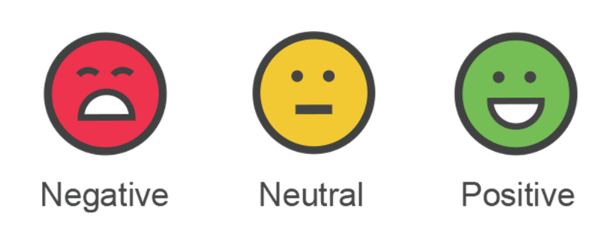

#### 별점 임베딩
> 리뷰의 각 문장에 별점 임베딩

In [ ]:
ndf = pd.read_csv('/content/drive/MyDrive/munning_rachine/dataset/PlaystoreReviewData(new).csv', encoding='utf-8-sig', index_col=0)
ndf

,Collection Date,App Name,Comment Date,User,Rating,Helpful,Comment,Answer,Comment_processed
0,2021-07-05 21:30,오딘: 발할라 라이징,2021-07-02,안유민,1,162,첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기열이 많아 접속자체를 할수가...,Kakao Games Corp.2021년 7월 5일안녕하세요. 신의 영역을 차지하라...,$첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기 열이 많아 접속 자체를 ...
1,2021-07-05 21:30,오딘: 발할라 라이징,2021-07-02,어제보다오늘더c.k. C,1,132,모바일 게임 그동안 참 많이 했는데... 다른 게임들은 그나마 실행후 플레이 하면서...,NaN,$모바일 게임 그동안 참 많이 했는데...$다른 게임들은 그나마 실행 후 플레이하면...
2,2021-07-05 21:30,오딘: 발할라 라이징,2021-06-29,유승엽,3,65,제2랑 차이보면 카툰과 실사느낌차이. 캐릭터 커스터마이징 비슷함. 이직 초반이지만 ...,NaN,$제2랑 차이 보면 카툰과 실사 느낌 차이. 캐릭터 커스터마이징 비슷함. 이직 초반...
3,2021-07-05 21:30,오딘: 발할라 라이징,2021-07-01,김용욱,1,58,자 자 어떤게임인지 간단히 소개해드릴께요. 전사 궁수 법사 힐러 고르세요. 화려한그...,NaN,$자 자 어떤 게임인지 간단히 소개해드릴게요.$전사 궁수 법사 힐러 고르세요.$화려...
4,2021-07-05 21:30,오딘: 발할라 라이징,2021-06-30,노랑꼬리,1,33,문장을 구매해서 강화하는데 무조건 실패시 파괴 ㅋㅋㅋㅋㅋㅋ 파괴 당하고 바로 삭제 ...,NaN,$문장을 구매해서 강화하는데 무조건 실패 시 파괴 ㅋㅋㅋㅋㅋㅋ 파괴 당하고 바로 삭...
...,...,...,...,...,...,...,...,...,...
10523,2021-07-05 21:30,Rider,2021-06-09,Hyunjo Kim,2,2,차고로 들어가면 게임이 멈춤,NaN,$차고로 들어가면 게임이 멈춤
10524,2021-07-05 21:30,Rider,2021-06-13,Mr김치,1,0,응 개똥게임 차선택이안된고클릭도 안되,NaN,$응 개똥 게임 찬 선택이 안된고 클릭도 안돼
10525,2021-07-05 21:30,Rider,2021-06-25,박점숙,5,0,눈동자 지 너무 잘 먹고,NaN,$눈동자 지 너무 잘 먹고
10526,2021-07-05 21:30,Rider,2021-06-15,장문자,5,0,그냥그대로멈추는데? 와 버그대박 불상해서 많ㅇㄱ드릴게요,NaN,$그냥 그대로 멈추는데?$와 버그 대박 불상해서 많ㅇㄱ드릴게요


In [ ]:
ndf.iloc[0][0:7]

Collection Date                                     2021-07-05 21:30
App Name                                                 오딘: 발할라 라이징
Comment Date                                              2021-07-02
User                                                             안유민
Rating                                                             1
Helpful                                                          162
Comment            첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기열이 많아 접속자체를 할수가...
Name: 0, dtype: object

In [ ]:
ndf['Comment_processed'][0].split('$')[1:]

['첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기 열이 많아 접속 자체를 할 수가 없습니다.',
 '돈은 썼는데 게임을 하다가 질려서 접은 것도 아니고 접속이 돼야 무슨 게임을 하죠',
 '하루 종일 대기 열기 다리느라 핸드폰을 켜 둘 수도 없고 직장생활하며 집에서 잠깐씩 하려는데 언제쯤 접속이 되나요.',
 '대기 열을 계속 이대로 둘 거면 환불해주시기 바랍니다.']

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_te

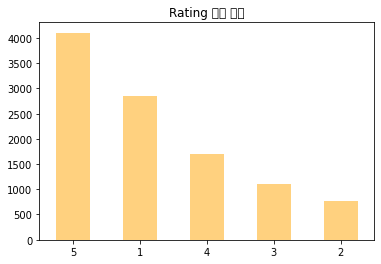

In [ ]:
#Rating 분포 확인
import matplotlib.pyplot as plt 

ax = ndf['Rating'].value_counts()
plt.rcParams['font.family'] = 'Malgun Gothic'
ax.plot(kind='bar',  title="Rating 분포 확인", color='orange', alpha=0.5, rot=1)

## 4. 모델링
> 감성 모델링

### 감성 모델링 (fastext 적용)

In [ ]:
!pip install fasttext

     |████████████████████████████████| 68 kB 4.4 MB/s 
  Using cached pybind11-2.7.1-py2.py3-none-any.whl (200 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3093639 sha256=c7d2d61818872ad11bbce06c4ac91920a24ed9a35df26f1e4ca9910e6d655765
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
import fasttext
import csv
from sklearn.model_selection import train_test_split

In [ ]:
ndf = ndf.drop(['Collection Date', 'App Name', 'Comment Date', 'User', 'Helpful', 'Comment', 'Answer'], axis=1)

In [ ]:
ndf

,Rating,Comment_processed
0,1,$첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기 열이 많아 접속 자체를 ...
1,1,$모바일 게임 그동안 참 많이 했는데...$다른 게임들은 그나마 실행 후 플레이하면...
2,3,$제2랑 차이 보면 카툰과 실사 느낌 차이. 캐릭터 커스터마이징 비슷함. 이직 초반...
3,1,$자 자 어떤 게임인지 간단히 소개해드릴게요.$전사 궁수 법사 힐러 고르세요.$화려...
4,1,$문장을 구매해서 강화하는데 무조건 실패 시 파괴 ㅋㅋㅋㅋㅋㅋ 파괴 당하고 바로 삭...
...,...,...
10523,2,$차고로 들어가면 게임이 멈춤
10524,1,$응 개똥 게임 찬 선택이 안된고 클릭도 안돼
10525,5,$눈동자 지 너무 잘 먹고
10526,5,$그냥 그대로 멈추는데?$와 버그 대박 불상해서 많ㅇㄱ드릴게요


In [ ]:
# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
exdf = ndf[(ndf['Rating']==1) | (ndf['Rating']==5)]
exdf

,Rating,Comment_processed
0,1,$첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기 열이 많아 접속 자체를 ...
1,1,$모바일 게임 그동안 참 많이 했는데...$다른 게임들은 그나마 실행 후 플레이하면...
3,1,$자 자 어떤 게임인지 간단히 소개해드릴게요.$전사 궁수 법사 힐러 고르세요.$화려...
4,1,$문장을 구매해서 강화하는데 무조건 실패 시 파괴 ㅋㅋㅋㅋㅋㅋ 파괴 당하고 바로 삭...
5,1,"$솔직히,, 겁나 기대했음$그러다가 광고가 전부일까 하는 생각에 기대감도 낮추고 일..."
...,...,...
10517,1,$버그 좀 없애라 차를 못 바꾸게 하면 어쩌라는 거
10521,1,$광고가 너무 많아요
10524,1,$응 개똥 게임 찬 선택이 안된고 클릭도 안돼
10525,5,$눈동자 지 너무 잘 먹고


In [ ]:
trainset, testset = train_test_split(exdf, test_size=0.1, random_state=20)
trainset.to_csv(path_or_buf='/content/drive/MyDrive/munning_rachine/grammar_dataset/trainset.csv', encoding = 'utf-8-sig', index=False)
testset.to_csv(path_or_buf='/content/drive/MyDrive/munning_rachine/grammar_dataset/testset.csv', encoding = 'utf-8-sig', index=False)

In [ ]:
trainset

,Rating,Comment_processed
3174,1,$광고 눌렀다가 휴대폰 액정 나가서 교체 서비스센터에서도 이유는 모르겠지만 기판에 ...
4309,1,$아니 게임이 들어가지지가 안는데 ㅇ. 게 게임인가 용량만 들지
698,5,$요즘 할 게임이 줄어서 찾는 중이었는데 등장한 재미있는 게임입니다.
1872,5,$다시 하니 갓겜 전투 시스템은 굉장히 좋고 퍼즐도 재밌다$이 게임을 했던 과거의 ...
1132,1,$인기차트에 이 게임이 있어서 해봤는데 하나 플레이하면 광고가 나오고 색을 바꿔도 ...
...,...,...
5800,5,$이런 종류 게임을 좋아하는데 정말 재미있어요$다만 생각 없이 막 할 수 있는 게임...
2226,1,$1별인 이유 1. 과금 유도: 시작하고 얼마 안 되어서 무기에 속성 붙고 뽑기를 ...
9876,5,$머야 원스서 개새밌게했는데 왜 안 알려줬어요 ㅜㅜ$이제야 다운로드하네ᅮᅮ
6509,1,$왜 광고 제거 샀는데 광고가 계속 뜨죠?$빨리 없애주세요


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/munning_rachine/trainset.csv')
test = pd.read_csv('/content/drive/MyDrive/munning_rachine/testset.csv')

file = open('/content/drive/MyDrive/munning_rachine/grammar_dataset/fasttext_trainset.txt','w+')
for i in train.index:
    line = '__label__' + train['Rating'][i].astype('str')+' '+train['Comment_processed'][i]
    file.write(line+"\n")
file = open('/content/drive/MyDrive/munning_rachine/grammar_dataset/fasttext_testset.txt','w+')
for i in test.index:
    line = '__label__' + test['Rating'][i].astype('str')+' '+test['Comment_processed'][i]
    file.write(line+"\n")    

In [ ]:
#hyper_params = {"lr": 0.1, "epoch": 10, "loss":"hs", "wordNgrams":2}
#model = fasttext.train_supervised(input="/content/drive/MyDrive/ID_게임 앱 리뷰 분석을 통한 맞춤 추천/trainset.txt", autotuneValidationFile='/content/drive/MyDrive/ID_게임 앱 리뷰 분석을 통한 맞춤 추천/testset.csv', autotuneDuration=600)
model = fasttext.train_supervised(input="/content/drive/MyDrive/munning_rachine/trainset.txt")
model.save_model("/content/drive/MyDrive/munning_rachine/model_google_play")

In [ ]:
model_acc_training_set = model.test('/content/drive/MyDrive/munning_rachine/trainset.txt')
model_acc_test_set = model.test('/content/drive/MyDrive/munning_rachine/testset.txt')

In [ ]:
model_acc_test_set

(464, 0.8297413793103449, 0.8297413793103449)

> 1과 5로 라벨 값을 할당 할 경우, 정확도 0.82  
> 1부터 5까지 라벨 값을 할당 할 경우, 정확도 0.55

### 감성 모델링 (AutoML 적용)

In [ ]:
!pip install pycaret
!pip install autokeras

     |████████████████████████████████| 264 kB 3.9 MB/s 
     |████████████████████████████████| 271 kB 46.4 MB/s 
     |████████████████████████████████| 80 kB 8.5 MB/s 
     |████████████████████████████████| 2.0 MB 48.0 MB/s 
     |████████████████████████████████| 248 kB 54.6 MB/s 
     |████████████████████████████████| 167 kB 48.4 MB/s 
     |████████████████████████████████| 1.7 MB 57.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 50.3 MB/s 
     |████████████████████████████████| 14.6 MB 33.4 MB/s 
     |████████████████████████████████| 6.8 MB 37.2 MB/s 
     |████████████████████████████████| 111 kB 53.3 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 675 kB 45.9 MB/s 
     |████████████████████████████████| 10.1 MB 47.4 MB/s 
     |████████████████

     |████████████████████████████████| 166 kB 4.0 MB/s 
     |████████████████████████████████| 97 kB 6.7 MB/s 
     |████████████████████████████████| 454.3 MB 17 kB/s 
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.5.1
    Uninstalling tensorflow-2.5.1:
      Successfully uninstalled tensorflow-2.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pykospacing 0.5 requires tensorflow==2.5.1, but you have tensorflow 2.5.0 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import autokeras as ak
from sklearn.model_selection import train_test_split

In [ ]:
from pycaret.classification import *

In [ ]:
ndf

,Rating,Comment_processed
0,1,$첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기 열이 많아 접속 자체를 ...
1,1,$모바일 게임 그동안 참 많이 했는데...$다른 게임들은 그나마 실행 후 플레이하면...
2,3,$제2랑 차이 보면 카툰과 실사 느낌 차이. 캐릭터 커스터마이징 비슷함. 이직 초반...
3,1,$자 자 어떤 게임인지 간단히 소개해드릴게요.$전사 궁수 법사 힐러 고르세요.$화려...
4,1,$문장을 구매해서 강화하는데 무조건 실패 시 파괴 ㅋㅋㅋㅋㅋㅋ 파괴 당하고 바로 삭...
...,...,...
10523,2,$차고로 들어가면 게임이 멈춤
10524,1,$응 개똥 게임 찬 선택이 안된고 클릭도 안돼
10525,5,$눈동자 지 너무 잘 먹고
10526,5,$그냥 그대로 멈추는데?$와 버그 대박 불상해서 많ㅇㄱ드릴게요


In [ ]:
clf = setup(data = ndf, target="Rating")

,Description,Value
0,session_id,604
1,Target,Rating
2,Target Type,Multiclass
3,Label Encoded,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4"
4,Original Data,"(10528, 2)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best3 = compare_models(sort='Accuracy', n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.3922,0.5071,0.2003,0.2257,0.2218,0.0011,0.0116,8.126
svm,SVM - Linear Kernel,0.3922,0.0000,0.2003,0.2259,0.2220,0.0015,0.0145,8.189
ridge,Ridge Classifier,0.3922,0.0000,0.2003,0.2259,0.2220,0.0015,0.0145,3.763
rf,Random Forest Classifier,0.3922,0.5000,0.2003,0.2259,0.2220,0.0015,0.0145,51.321
dt,Decision Tree Classifier,0.3920,0.5000,0.2003,0.2259,0.2219,0.0014,0.0130,137.822
et,Extra Trees Classifier,0.3920,0.5000,0.2003,0.2259,0.2219,0.0014,0.0130,158.540
qda,Quadratic Discriminant Analysis,0.3918,0.0000,0.2000,0.1535,0.2206,0.0000,0.0000,24.387
ada,Ada Boost Classifier,0.3918,0.5003,0.2000,0.1535,0.2206,0.0000,0.0000,5.895
gbc,Gradient Boosting Classifier,0.3918,0.5039,0.2000,0.1535,0.2206,0.0000,0.0000,96.091
lightgbm,Light Gradient Boosting Machine,0.3918,0.5000,0.2000,0.1535,0.2206,0.0000,0.0000,0.753


In [ ]:
best3

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=604, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
               power_t=0.5, random_state=604, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, normalize=False, random_state=604, solver='auto',
                 tol=0.001)]